# Computer vision projects on classifying traffic sign. 


: data augmentation, why this CNN and plot the probability of the knn top5 

From exporation, there are 34799 training sets and 12630 testing sets. 
Each of the image has 32*32*3.
Roughly around 40+ classes.
The goal is to leverage a unbalance and relativity speaking small dataset to classify with deep neuarl networking.

Recall from deep learning foundations course from deeplearning.ai, classic machine learning requires around 100-10,000 samples and deep learning requires around 1 million sample. 

Given neural network does not require any data balance having each class, I would like to see the difference between data split and also data size. 

In [29]:
# Load pickled data
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import cv2
import tensorflow as tf
from sklearn.utils import shuffle

# Visualizations will be shown in the notebook.
%matplotlib inline

training_file = "./traffic-signs-data/train.p"
validation_file = "./traffic-signs-data/test.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
    
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, Y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("Y_valid shape", X_valid.shape)
print("Y_valid shape", Y_valid.shape)
print("Y_train shape", X_train.shape)
print("Y_test shape", X_test.shape)

X_train shape (34799, 32, 32, 3)
X_test shape (12630, 32, 32, 3)
Y_valid shape (12630, 32, 32, 3)
Y_valid shape (12630,)
Y_train shape (34799, 32, 32, 3)
Y_test shape (12630, 32, 32, 3)


In [ ]:
signnames = pd.read_csv('signnames.csv')
label_names = list(signnames)
y_train_df = pd.DataFrame()
y_train_df['label'] = y_train

# Get current size
figsize=(15, 7)
 
# Prints: [8.0, 6.0]

item, count = np.unique(y_train, return_counts=True)
freq = np.array((item, count)).T
plt.figure(11)
plt.yticks(range(len(y_train)), signnames.SignName)
#plt.yticks(list(map(lambda x: label_dict[x], y_train['label'].value_counts().index.tolist())))            
plt.barh(item, count, alpha=0.3)
plt.title('Traffic Sign Data Distrubition')

plt.show()

In [ ]:
#plot and see how data distribution looks like
n_classes = len(np.unique(y_train))
Y_test_class = len(np.unique(y_test))

def plot_dist(data) :
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(y_testing, np.arange(-0.5, n_classes+1.5), stacked=True)
    (Y_test_class, np.arange(n_classes+1.5)).plt.bar()
    #ax.hist(y_testing, np.arange(-0.5, n_classes+1.5), stacked=True)
    #ax1.hist(y_training, np.arange(-0.5, n_classes+1.5), stacked=True)
    #pd.concat(dict(df1= y_testing, df2 = y_training), azis = 1).plot(kind='bar', stack =True)
    ax.set_xlim(-0.5,n_classes-0.5)
    ax.legend()
    ax.set_title('Distribution of images')

plot_dist(y_train)
plot_dist(y_test)


In [ ]:
classID = signnames['SignName'].values
n_classes = np.unique(y_train[0]).shape[0]
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
for i, y in enumerate(y_train):
    ax.bar(range(n_classes), np.bincount(y), width=1., align='center', color=colors[i], label=labels[i])

plt.xlim([-1, n_classes])
ax.xaxis.grid(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.grid(False)
ax.set_xticks(range(n_classes))
ax.set_xticklabels(class_table, rotation=90, size='xx-small')
legend = ax.legend(loc='upper center', shadow=True)
legend_frame = legend.get_frame()
legend_frame.set_facecolor('white')
legend_frame.set_edgecolor('black')
plt.ylabel('# examples')
plt.title(title)
    
    


From the exploration, there the training and testing dataset obtains about the same ratios of classes.


#Question 1
Describe how you preprocessed the data. Why did you choose that technique?

1. I am planning to preprocess my image by converting into greyscale that can save a lot of computer power from 3 channels to 1, since I dont have GPU on my laptop nor planning to train on cloud. 
Next step is to normalizied dataset, the process would allows each dimensions have a similar scale


there are always different approches on this: 
1. loop image one by one with CV2 (easiest way)
2. passing through normalizing (pixel - 128)/ 128, then img.astype(np.float32), passing through the CV2, and finally reshape from 32,32,3 to 32,32,1
X_train_gray = np.zeros((N, 32, 32, 1), dtype=np.float32)

- in your for loop
X_train_gray[i] = normalize_img(element)

https://discourse-cdn-sjc3.com/udacity/uploads/default/original/4X/5/7/1/5719666845aa31c56610cb2c27f4a16c7fc4c022.png
3. converting RGB to YCbCr (Y: Luminance; Cb: Chrominance-Blue; and Cr: Chrominance-Red are the components. Luminance is very similar to the grayscale version of the original image)


3.from image_preprocessor import ImagePreprocessor

image_preprocessor = ImagePreprocessor()
image_preprocessor.call() 

In [ ]:
def preprocess(img):
    temp = []
    for i in range(0,len(img)):
        img = cv2.imread(img[i])
        img = cv2.cvtColor(img[i],cv2.COLOR_BGR2GRAY)
        img = np.reshape(img, img.shape + (1,))
        temp.append(img)
    #img = np.reshape(temp,(-1,32,32,1))
    img = cv2.equalizeHist(img)
    clahe = cv2.createCLAHE(cliplimit = 2.0, tileGridSize=(8,8))
    img = np.sum(img/3,  keepdims = True)
    img = img.astype(float) / 255.0
    return img
X_train= preprocess(X_train)
X_test= preprocess(X_test)
X_valid = preprocess(X_valid)


In [ ]:
#apply a sample image into one file
sample = np.copy(X_train[0])
sample = cv2.cvtColor(sample,cv2.COLOR_BGR2GRAY)
#sample= np.expand_dims(cv2.equalizeHist(sample), axis = 2)
plt.imshow(sample)

In [ ]:
len(sample)

In [ ]:
from skimage import transform
sample = X_train[0].copy()
#sample = np.zeros((1,32,32,1))
sample = cv2.cvtColor(sample,cv2.COLOR_BGR2GRAY)
sample= np.expand_dims(cv2.equalizeHist(sample), axis = 2)
#sample = np.reshape(len(sample),(32,32,1))
#sample = cv2.equalizeHist(sample)
clahe = cv2.createCLAHE(cliplimit = 2.0, tileGridSize=(8,8))
sample = np.expand_dims(clahe.apply(sample), axis = 2)
#sample = sample.astype(float) / 255.0
#sample = np.sum(sample/3, axis=3, keepdims = True)
#sample = np.reshape(sample,(-1,32,32,1))

plt.imshow(sample)

In [ ]:
def normalize(image):
    return image.astype(float) / 255.0

def preprocess(img):
    image= [] 
    for i in img:
        image.append(normalize(i))
    return np.array(image).reshape((-1,32,32,1))


#X_train= preprocess(X_train)
#X_test= preprocess(X_test)
#X_valid = preprocess(X_valid)


In [ ]:
#X_train.shape
y_train.shape

In [31]:
def normalize(img):
    return img.astype(float)/255.0
    
def preprocess(img):
    image = []
    for i in img:
        image.append(normalize(i))
    return np.array(image).reshape((-1,32,32,1))

def translation(img, x=1, y=1):
    row,cols,_=img.shape
    M = np.float32(([1,0,x],[0,1,y]))
    return cv2,waroAffine(img,M(cols, rows)).astype()

def rotation(img,angle= 10,scale=1):
    rows,cols,_ = img.shape
    martrix = cv2.getRotationMatrix2D((cols/2,rows/2),angle,scale)
    return cv2.warpAffine(img,matrix,(cols, rows)).astype(np.unit8)

def brightness_augment(img, value = 30):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h,s,v = cv2.split(hsv)
    lim = 255- value
    v[v>lim]= 255
    v[v<=lim] += value
    hsv = cv2.merge([h,s,v])
    img = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
    return img

import random
import numpy as np
def augment_images(image, count = 1):
    random_number = [1,2]
    augment_choice = np.random.choice(random_number)
    augment_choice = 2
    
    rotation_angle = int(10*(1+count/4))
    brightness_value = int(30*(1+count/4))
    
    if augment_choice ==1:
        image= rotation(image,rotation_angle)
    else:
        image = brightness_augment(image,brightness_value)
    return image

def balance_augment(X,Y, maximum_number = 1800, threshold = 1.0):
    X_aug = []
    Y_aug = []
    unique_numbers, counts = np.unique(Y, return_counts = True)
    for count, number in zip(counts, unique_numbers):
        augment_number = maximum_number/count
        if augment_number > threshold:
            augment_number = int(augment_number)
            for i in range(augment_number):
                indices = (Y == number).nonzero()[0]
                for j in indices:
                    new_images = augment_images(X[j],i)
                    X_aug.append(new_images)
                    Y_aug.append(number)
    X_aug = np.array(X_aug)
    Y_aug = np.array(Y_aug)
    print(X_aug.shape)
    X = np.append(X,X_aug, axis = 0)
    Y = np.append(Y,Y_aug, axis = 0)
    return X,Y


In [32]:
X_train, y_train = balance_augment(X_train, y_train)

#plt.imshow(preprocessed[0])
#X_train = (X_train)
#X_train.shape
#balance_augment(X_train,y_train)

(57837, 32, 32, 3)


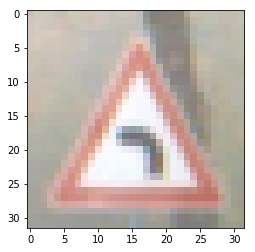

In [43]:
plt.imshow(X_train[56000])

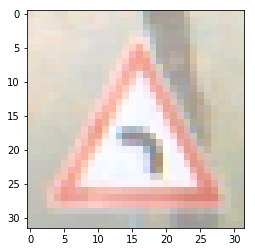

In [37]:
plt.imshow(X_train[56720])

In [26]:
X_train= preprocess(X_train)
y_train= preprocess(y_train)
X_test= preprocess(X_test)
X_valid = preprocess(X_valid)

X_train.shape

ValueError: cannot reshape array of size 92636 into shape (32,32,1)

In [25]:
print("Updated Image Shape: {}".format(y_train[0].shape))
print("updated image shapes two: {}".format(y_train[1].shape))

Updated Image Shape: ()
updated image shapes two: ()


In [ ]:
#X_train, y_train = balance_augment(X_train, y_train)

plt.imshow(preprocessed[0])
X_train = (X_train)
X_train.shape
balance_augment(X_train,y_train)

In [ ]:
print("X Train before augmentation".format(X_train.shape))
print("X_train after".format(X_train.shape))

In [ ]:
def histogram_equalization(img_array):
    l,w,h = img_array.shape[1:]
    equalized_images = np.empty((0,l,w,h))
    for i in range(len(img_array)):
        img_yuv = cv2.cvtColor(img_array[i], cv2.COLOR_BGR2YUV)
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
        img_out = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
        img_out = np.reshape(img_out, (1,l,w,h))
        equalized_images = np.append(equalized_images, img_out,axis = 0)
    return equalized_images 

#X_train = histogram_equalization(X_train)

#Question 2
Describe how you set up the training, validation and testing data for your model.
Once I have my data preprocess, next splitting the data into 80,20

In [44]:
#shuffle the data afterwards 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.02, random_state=0)


print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("Y_valid shape", X_validation.shape)

X_train shape (90783, 32, 32, 3)
X_test shape (12630, 32, 32, 3)
Y_valid shape (1853, 32, 32, 3)


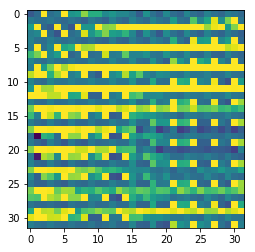

In [65]:
#each time it will show a different image
import random
def showImg(data):
    random = np.random.randint(len(data))
    image = data[random].squeeze()
    plt.figure()
    plt.imshow(image)
    
showImg(X_train)

In [51]:
X_train= preprocess(X_train)
X_test= preprocess(X_test)
X_valid = preprocess(X_valid)
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("Y_valid shape", X_validation.shape)

X_train shape (272349, 32, 32, 1)
X_test shape (37890, 32, 32, 1)
Y_valid shape (1853, 32, 32, 3)


I was able to tune the suggested algorithm have a 93.1% validation, and testing and training with a 100%, yet when new images from web are test on the classifer, it turns out having only 1 right out of 5. 
therefore, I am going to have more data by augmenting more for the classes that has lesser dataset on.

# Question 3
What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.) For reference on how to build a deep neural network using TensorFlow, see Deep Neural Network in TensorFlow from the classroom


I am using a 4 layer network :
Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
Activation:relu
Pooling. Input = 28x28x6. Output = 14x14x6.
Layer 2: Convolutional. Output = 10x10x16.
Activation: relu
Pooling. Input = 10x10x16. Output = 5x5x16.
Layer 3: Convolutional. Output = 1x1x400.
Activation: relu
Flatten. Input = 5x5x16. Output = 400
Flatten x: Input = 1x1x400. Output = 400.
Concat layer2flat and x. Input = 400 + 400. Output = 800
Dropout
Layer 3: Convolutional. Output = 1x1x400.
Dropout
Layer 4: Fully Connected. Input = 800. Output = 43.

#Question 4
How did you train your model?
 about the optimizer used, and some of the hyperparameters (learning rate, keep_prob).



EPOCHS = 30
BATCH_SIZE = 64

In [52]:
import tensorflow as tf
EPOCHS = 30
BATCH_SIZE = 64

In [69]:
#applying leNet in Tensorflow

from tensorflow.contrib.layers import flatten
def LeNet(x):    
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="W1")
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6), name="b1")
    x = tf.nn.bias_add(x, b1)
    print("layer 1 shape:",x.get_shape())

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="W2")
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16), name="b2")
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Layer 3: Convolutional. Output = 1x1x128
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 128), mean = mu, stddev = sigma), name="W3")
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(128), name="b3")
    x = tf.nn.bias_add(x, b3)
    
    # TODO: Layer 4: Convolutional. Output = 2X2X400
    W4 = tf.Variable(tf.truncated_normal(shape=(5, 5, 128, 400), mean = mu, stddev = sigma), name="W4")
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b4 = tf.Variable(tf.zeros(400), name="b4")
    x = tf.nn.bias_add(x, b4)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)
    x = flatten(x)

    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Layer 5: Fully Connected. Input = 800. Output = 43.
    W5 = tf.Variable(tf.truncated_normal(shape=(1600, 400), mean = mu, stddev = sigma), name="W5")
    b5 = tf.Variable(tf.zeros(400), name="b5")    
    x = tf.add(tf.matmul(x, W5), b5)
    
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, keep_prob)
    logits = tf.add(tf.matmul(x,W5),b5)

    return logits


In [70]:
#(BATCH_SIZE, height, width, depth)
x = tf.placeholder(tf.float32, (None, 32, 32, 1))

# Placeholder for labels
y = tf.placeholder(tf.int32, (None))

# One-hot encoding of labels
one_hot_y = tf.one_hot(y, 43)

# Probability to keep units
keep_prob = tf.placeholder(tf.float32)

In [71]:
# Learning rate
rate = 0.001
mu = 0 
sigma = 0.1
# Pass input data to the LeNet function
logits = LeNet(x)

# Compare logits to the ground-truth labels and calculate the cross entropy
# Cross entopy is a measure how different the logits
# are from the ground-truth training labels
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
# Average the cross entropy from all the training images
loss_operation = tf.reduce_mean(cross_entropy)
# Use Adam algorithm (alternative of stochastic gradient descent)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
# Optimizer uses backpropagation to update the network and minimize training loss
#training_operation = optimizer.minimize(loss_operation)

layer 1 shape: (?, 28, 28, 6)


ValueError: Dimensions must be equal, but are 20 and 16 for 'Conv2D_22' (op: 'Conv2D') with input shapes: [?,13,13,20], [2,2,16,20].

In [ ]:
# Compare the logit prediction to the one hot encoded ground-truth label
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
# Calculate the model's overall accuracy by averaging the individual prediction accuracies
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict = {x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
# Create the TensorFlow session and Initialize the variables
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training in progress...")
    print()
    for i in range(EPOCHS):
        # Shuffle the training data to ensure that trainint isn't biased
        # by the order of the images
        X_train, y_train = shuffle(X_train, y_train)
        # Break training data into batches and train the model on the each batch
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict = {x: batch_x, y: batch_y, keep_prob: 1.0})
        
        # In the end of each EPOCH evaluate the model on validation data
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, Y_valid)
        print("EPOCH {0} ...".format(i + 1))
        print("Training Accuracy = {:.5f}".format(training_accuracy))
        print("Validation Accuracy = {:.5f}".format(validation_accuracy))
        print()
    
    # Save the model
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet_sign_classifier')
    print("Model saved")

#Question 5
What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem.

This has been a back and forth challenge where I truly invest my time on data agumentations vs trying other neural network and tuning their parameters. 

This takes me for a few weeks to get to this acceptable accuracy.

In [ ]:
#saver = tf.train.Saver()

with  tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    save_path = saver.save(sess, "/tmp/model.ckpt")
    print("Model saved in path: %s" % save_path)    
    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.5f}".format(train_accuracy))
    valid_accuracy = evaluate(X_valid, Y_valid)
    print("Validation Accuracy = {:.5f}".format(valid_accuracy))


In [ ]:
with  tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    Test_accuracy = evaluate(X_train, y_train)
    print("Test Accuracy = {:.5f}".format(Test_accuracy))

#Question 6
Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult?

Those images are search under German traffic sign and somehow it shouldnt be any harder or confusing than pervious training ones. I thought of using Hong Kong  traffic sign where there is an english and chinese character side by side but turns out it totally doesnt work at all.


In [ ]:
import glob
my_image = np.zeros((5,32,32,1))
for i, img in enumerate(glob.glob('./traffic-signs-data/germansign/image*.jpg')):
    image = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (32, 32))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = (image -128/128)
    my_image[i][:][:][:] =np.array(image)[...,np.newaxis]
    plt.imshow(image)
    plt.show()
    #figures[i] = my_image[i].squeeze()
    #plot_figures(figures)
labels = np.array([28,35,25,25,25], dtype = 'uint8')

In [ ]:
my_single_item_array = []
my_single_item_label_array = []

for i in range(5):
    my_single_item_array.append(my_image[i])
    my_single_item_label_array.append(labels[i])

    with tf.Session() as sess2:
        sess2.run(tf.global_variables_initializer())
#         saver = tf.train.import_meta_graph('./lenet.meta')
        saver.restore(sess2, tf.train.latest_checkpoint('.'))
        my_accuracy = evaluate(my_image, labels)
        print('Image {}'.format(i+1))
        print("Image Accuracy = {:.3f}".format(my_accuracy))
        print()

In [ ]:
with tf.Session() as sess2:
    sess2.run(tf.global_variables_initializer())
    saver.restore(sess2, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(my_image, labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

    
for i, image in enumerate(my_image):
    #grid = plt.subplot(len(my_image)/4,5,i+1)
    image = image.squeeze()
    #grid.imshow(image), plt.axis('off')
    plt.imshow(image)
    plt.show()
    #plt.title(signnames[str(outputclass[i])])

plt.show()

In [ ]:
logits = LeNet(x)
softmax = tf.nn.softmax(logits)

sess2 = tf.get_default_session()

with tf.Session() as sess2:
    sess2.run(tf.global_variables_initializer())
    saver.restore(sess2, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(my_image, labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    result = sess2.run(softmax, feed_dict={x: my_image,keep_prob: 1.})
    values, indices = tf.nn.top_k(result, 5)
    
    predictions  = sess2.run(values)
    predictionIndicies  = sess2.run(indices)
    print("softmax probabilties for top 5 predictions are:")
    print(predictions)
    print("predictionIndicies")
    print(predictionIndicies)
    

In [ ]:
logits = LeNet(x)
softmax = tf.nn.softmax(logits)

sess2 = tf.get_default_session()

with tf.Session() as sess2:
    sess2.run(tf.global_variables_initializer())
    saver.restore(sess2, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(my_image, labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    result = sess2.run(softmax, feed_dict={x: my_image,keep_prob: 1.})
    values, indices = tf.nn.top_k(result, 5)
    
    predictions  = sess2.run(values)
    predictionIndicies  = sess2.run(indices)
    print("softmax probabilties for top 5 predictions are:")
    print(predictions)
    print("predictionIndicies")
    print(predictionIndicies)
    
top_k_values = predictions[0]
top_k_indices = predictionIndicies[1]

ind = np.arange(5) 

for i in range(5):
    plt.figure(figsize=(4,2))
    values = top_k_values[i]
    plt.bar(ind, values, 0.2, color='b')
    plt.ylabel('Softmax probability')
    plt.xlabel('Labels')
    plt.title('Top 5 Softmax Probabilities for Test Image {}'.format(str(i+1)))
    plt.xticks(ind, tuple(top_k_indices[i]))

plt.show()
    #bar(np.arange(n_classes), result[(i-1)//2]) 
    #plt.figure()
    #plt.bar(result.indices[i],result.values[i], align='center', alpha=0.5)
    #plt.xlim([0,42])
    #plt.title("{}, label = {}".format( names[i], Y_test_web[i] ) )

In [ ]:
https://github.com/ashoeb81/CarND-TrafficSigns-Solution-Final/blob/master/Traffic_Signs_Recognition.ipynb